In [ ]:
import joblib
import pandas as pd
import shap
import os

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# ✅ 1. Load your newly trained model (updated path)
model_path = os.path.join("aqi_feature_store", "rf_aqi_model.pkl")
model = joblib.load(model_path)

In [3]:
# ✅ 2. Load your corresponding processed feature data
X = pd.read_csv(r"C:\Users\HP\Desktop\AQI predictor\data\processed\processed_karachi_unscaled.csv")

In [4]:
# Optional: If your CSV still has extra columns like 'aqi', 'sensor_id', or 'event_timestamp',
# drop them before SHAP analysis to match the model's feature input
X = X.drop(columns=["aqi", "sensor_id", "event_timestamp"], errors="ignore")

 99%|===================| 4276/4341 [01:01<00:00]        

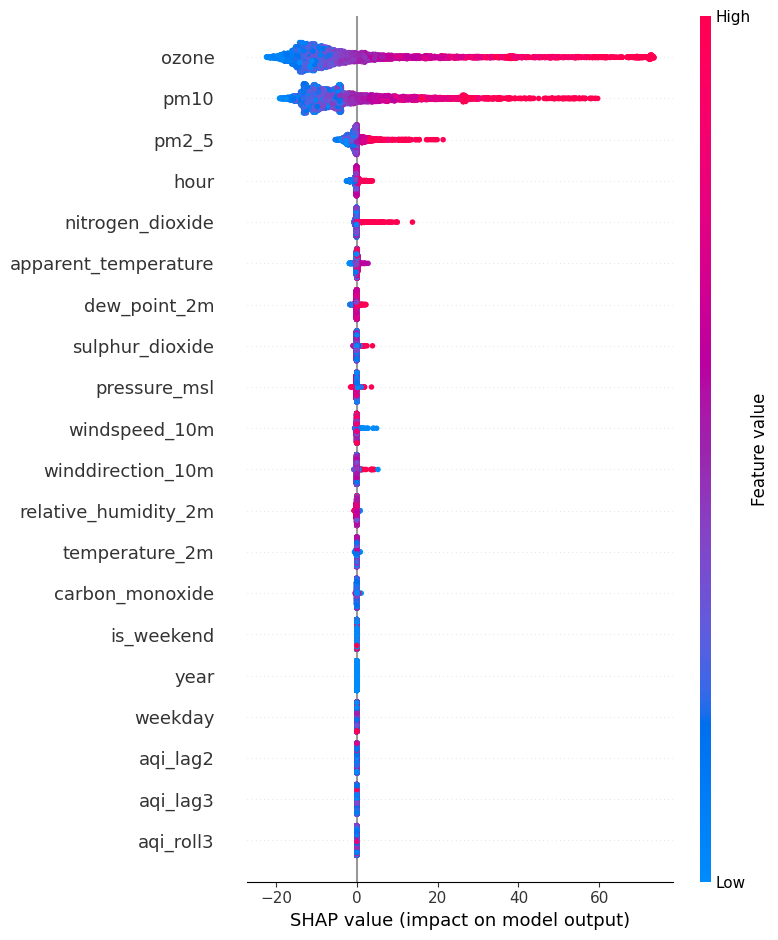

In [8]:
X = X.select_dtypes(include=['number'])  # drop non-numeric columns

# Initialize SHAP explainer
explainer = shap.Explainer(model, X)

# Compute SHAP values safely
shap_values = explainer(X, check_additivity=False)

# Visualize results
shap.summary_plot(shap_values, X)

In [11]:
print("Model expects features:", len(model.feature_importances_))
print("X currently has columns:", len(X.columns))


Model expects features: 15
X currently has columns: 27


In [13]:
print(X.columns.tolist())


['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'pressure_msl', 'windspeed_10m', 'winddirection_10m', 'hour', 'day', 'month', 'year', 'weekday', 'is_weekend', 'aqi_change', 'aqi_pct_change', 'aqi_lag1', 'aqi_lag2', 'aqi_lag3', 'aqi_roll3', 'aqi_roll6', 'aqi_roll24']


In [14]:
print(model.feature_names_in_)


['pm10' 'pm2_5' 'carbon_monoxide' 'nitrogen_dioxide' 'sulphur_dioxide'
 'ozone' 'temperature_2m' 'relative_humidity_2m' 'dew_point_2m'
 'apparent_temperature' 'pressure_msl' 'windspeed_10m' 'winddirection_10m'
 'aqi_change' 'aqi_pct_change']


🔹 Top Features by Importance:
                 Feature  Importance
5                  ozone    0.701523
0                   pm10    0.272683
1                  pm2_5    0.014700
3       nitrogen_dioxide    0.002539
9   apparent_temperature    0.001084
4        sulphur_dioxide    0.001039
13            aqi_change    0.001031
8           dew_point_2m    0.000937
11         windspeed_10m    0.000926
12     winddirection_10m    0.000876
10          pressure_msl    0.000845
14        aqi_pct_change    0.000677
7   relative_humidity_2m    0.000580
6         temperature_2m    0.000341
2        carbon_monoxide    0.000220


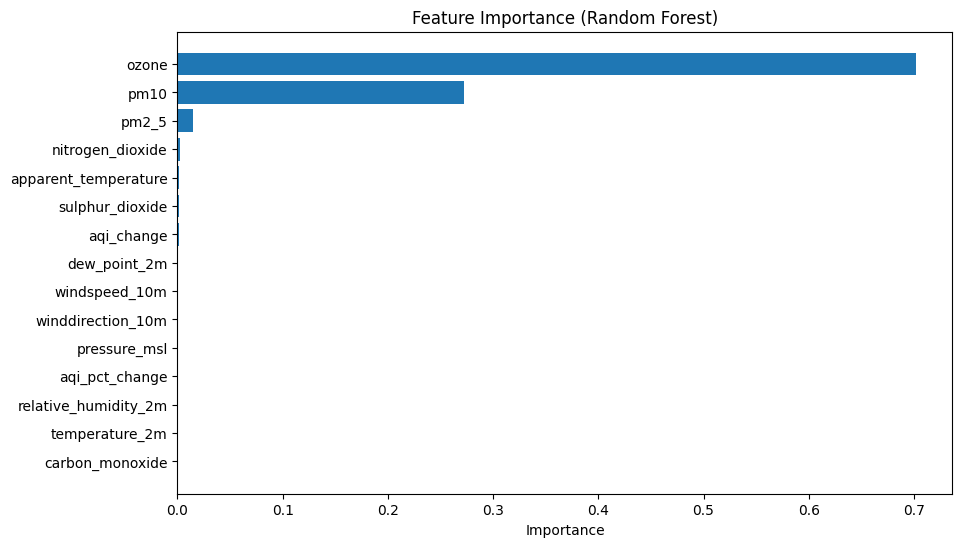

In [15]:
import pandas as pd

# Keep only the features used during model training
training_features = [
    'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide',
    'ozone', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
    'apparent_temperature', 'pressure_msl', 'windspeed_10m', 'winddirection_10m',
    'aqi_change', 'aqi_pct_change'
]

X = X[training_features]

# Get feature importances
importances = model.feature_importances_

# Combine into a DataFrame for better readability
importance_df = pd.DataFrame({
    "Feature": training_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("🔹 Top Features by Importance:")
print(importance_df)

# (Optional) visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [16]:

# ✅ 4. Initialize SHAP Explainer (TreeExplainer for RandomForest)
explainer = shap.TreeExplainer(model)

# ✅ 5. Calculate SHAP values safely
shap_values = explainer(X, check_additivity=False)

# ✅ 6. Create summary plot and save it
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X, show=False)
plt.title("SHAP Summary Plot - AQI Model", fontsize=14)
plt.tight_layout()
plt.savefig("shap_summary.png", bbox_inches='tight', dpi=300)
plt.close()

print("✅ SHAP summary plot saved successfully as 'shap_summary.png'")

✅ SHAP summary plot saved successfully as 'shap_summary.png'


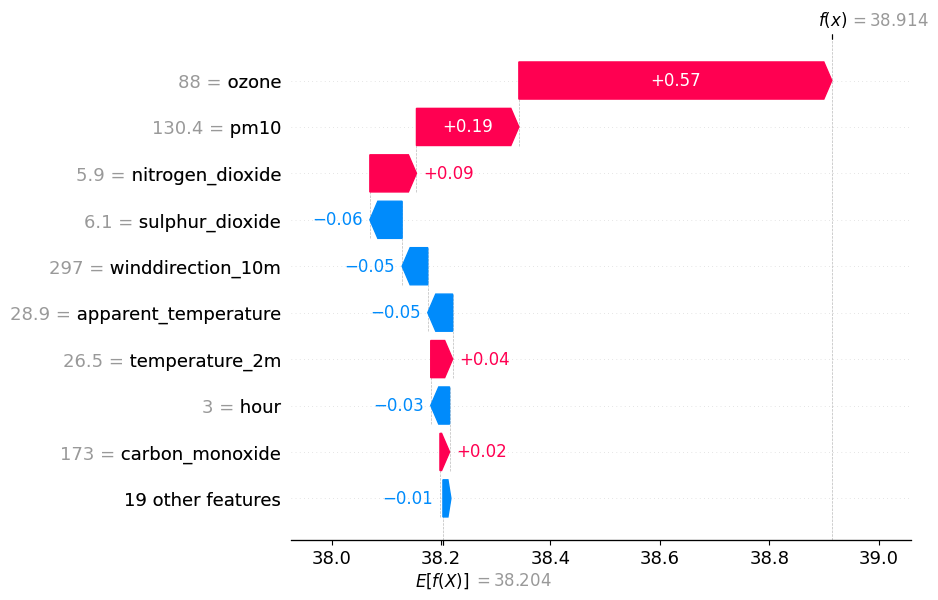

In [8]:
i = 0  # index of sample
shap.plots.waterfall(shap_values[i])


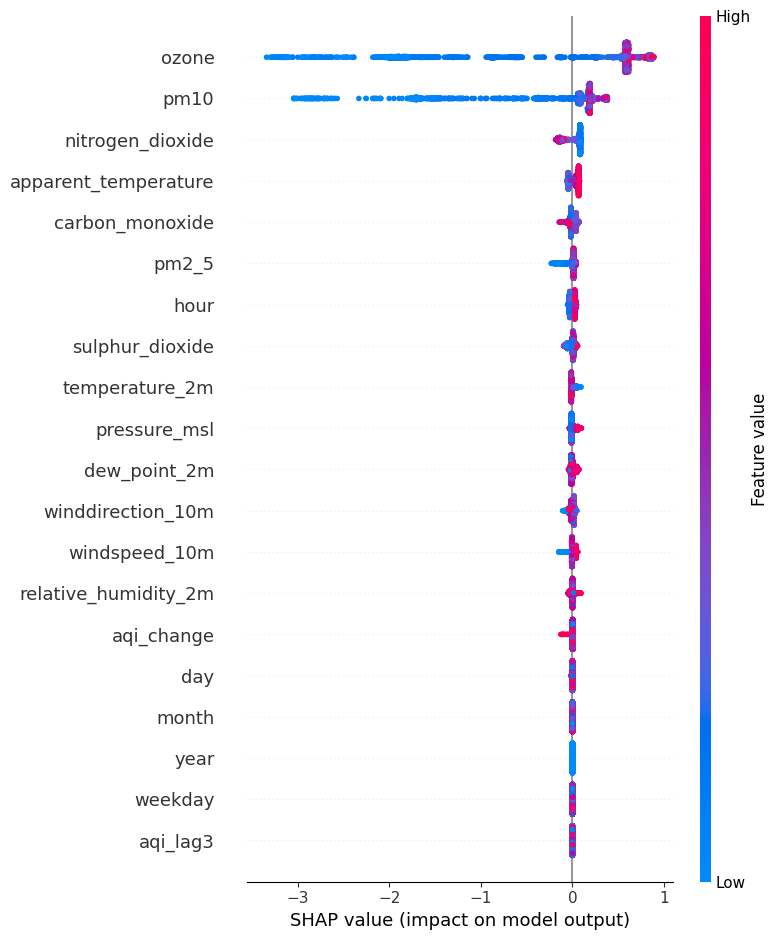

In [9]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values, X, show=False)
plt.savefig("shap_summary.png", bbox_inches='tight')


In [11]:
import shap
import numpy as np
shap_values = shap.Explainer(model, X)(X)
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mean_abs_shap
}).sort_values('Importance', ascending=False)
importance.to_csv('feature_importance.csv', index=False)


 99%|===================| 4311/4341 [00:53<00:00]        

In [14]:
import shap
import joblib
import pandas as pd
import numpy as np

# Load your trained model
model = joblib.load(r"C:\Users\HP\Desktop\AQI predictor\data\models\random_forest_aqi.pkl")

# Load or create the dataset you used for training
# Make sure X is the same shape as model input
X = pd.read_csv(r"C:\Users\HP\Desktop\AQI predictor\data\processed\processed_karachi_unscaled.csv")

X = X.select_dtypes(include=['number'])

# Create SHAP explainer
explainer = shap.Explainer(model, X)

# Compute SHAP values
shap_values = explainer(X)

# Calculate mean absolute SHAP value per feature
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": mean_abs_shap
}).sort_values("Importance", ascending=False)

# Save for frontend
importance.to_json(r"C:\Users\HP\Desktop\AQI predictor\data\feature_importance.json", orient="records")
print("✅ Feature importance saved successfully!")


 99%|===================| 4292/4341 [00:49<00:00]        

✅ Feature importance saved successfully!
